# Feature Engineering(Dhaka-2017 Dataset) 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Dhaka\\real_2017.csv")

In [3]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,-,-,-,-,-,-,-,-,427,EU
1,2,20.3,27.5,16.4,1014,72,2.6,0,-,373,EU
2,3,22.5,27.2,15.9,1013.5,66,3.2,2.2,5.4,353,EU
3,4,23.6,27.2,16.7,1012.5,53,2.9,3.1,5.4,235,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339,EU


In [4]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   D         365 non-null    object
 1   T         226 non-null    object
 2   TM        226 non-null    object
 3   Tm        226 non-null    object
 4   SLP       226 non-null    object
 5   H         226 non-null    object
 6   VV        226 non-null    object
 7   V         226 non-null    object
 8   VM        226 non-null    object
 9   AQI       365 non-null    int64 
 10  Category  365 non-null    object
dtypes: int64(1), object(10)
memory usage: 31.5+ KB


In [5]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,-,-,-,-,-,-,-,-,427,EU
1,2,20.3,27.5,16.4,1014,72,2.6,0,-,373,EU
2,3,22.5,27.2,15.9,1013.5,66,3.2,2.2,5.4,353,EU
3,4,23.6,27.2,16.7,1012.5,53,2.9,3.1,5.4,235,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,-,-,-,-,-,-,-,-,323,EU
361,28,19.1,24.6,16.2,1014.2,84,1.9,1.9,3.5,303,EU
362,29,21.7,27,15.3,1014.2,70,2.9,0,-,297,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,VU


In [6]:
aqi_data.isnull().sum()

D             0
T           139
TM          139
Tm          139
SLP         139
H           139
VV          139
V           139
VM          139
AQI           0
Category      0
dtype: int64

In [7]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427,EU
1,2,20.3,27.5,16.4,1014,72,2.6,0,NaN,373,EU
2,3,22.5,27.2,15.9,1013.5,66,3.2,2.2,5.4,353,EU
3,4,23.6,27.2,16.7,1012.5,53,2.9,3.1,5.4,235,VU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,EU
361,28,19.1,24.6,16.2,1014.2,84,1.9,1.9,3.5,303,EU
362,29,21.7,27,15.3,1014.2,70,2.9,0,NaN,297,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,VU


In [8]:
aqi.isnull().sum()

D             0
T           208
TM          208
Tm          208
SLP         208
H           208
VV          208
V           208
VM          250
AQI           0
Category      0
dtype: int64

<AxesSubplot:>

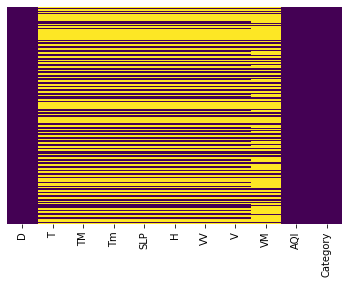

In [9]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 
T = Average Temperature (°C) , TM = Maximum temperature (°C), 

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa), 

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


## Convert object type as float type

In [10]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1(January)

Find monthly mean

In [11]:
df1 = aqi.iloc[0:31,0:11]
df1.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427,EU
1,2,20.3,27.5,16.4,1014.0,72.0,2.6,0.0,NaN,373,EU
2,3,22.5,27.2,15.9,1013.5,66.0,3.2,2.2,5.4,353,EU
28,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172,U
29,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243,VU
30,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267,VU


In [12]:
df1.isnull().sum()

D            0
T           22
TM          22
Tm          22
SLP         22
H           22
VV          22
V           22
VM          25
AQI          0
Category     0
dtype: int64

In [13]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())

In [14]:
df1.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.833333,27.266667,15.688889,1013.177778,60.555556,3.322222,1.2,4.45,427,EU
1,2,20.300000,27.500000,16.400000,1014.000000,72.000000,2.600000,0.0,4.45,373,EU
2,3,22.500000,27.200000,15.900000,1013.500000,66.000000,3.200000,2.2,5.40,353,EU
3,4,23.600000,27.200000,16.700000,1012.500000,53.000000,2.900000,3.1,5.40,235,VU
4,5,21.833333,27.266667,15.688889,1013.177778,60.555556,3.322222,1.2,4.45,339,EU


# Month-2 (February)

In [15]:
df2 = aqi.iloc[31:59,0:11]
df2.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,20.1,27.4,15.0,1014.9,60.0,3.5,1.3,3.5,312,EU
32,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284,VU
33,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280,VU
56,26,22.2,29.8,15.6,1010.3,41.0,4.8,0.9,3.5,341,EU
57,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306,EU
58,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320,EU


In [16]:
df2.isnull().sum()

D            0
T           23
TM          23
Tm          23
SLP         23
H           23
VV          23
V           23
VM          25
AQI          0
Category     0
dtype: int64

In [17]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())

In [18]:
df2.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,20.10,27.40,15.00,1014.90,60.0,3.50,1.3,3.5,312,EU
32,2,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,284,VU
33,3,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,280,VU
34,4,23.18,29.62,16.88,1011.88,50.0,4.06,0.7,3.5,238,VU
35,5,26.10,32.00,16.00,1012.00,37.0,4.30,1.3,3.5,212,VU


In [19]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-3(March)

In [20]:
df3 = aqi.iloc[59:90,0:11]
df3.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,26.7,31.5,17.9,1011.3,37.0,3.9,0.9,3.5,333,EU
60,2,27.2,33.2,18.0,1009.2,47.0,3.7,1.9,3.5,283,VU
61,3,25.9,33.4,21.4,1007.1,67.0,4.0,0.9,3.5,168,U
87,29,26.9,30.1,25.5,1006.7,84.0,4.0,0.7,5.4,102,C
88,30,28.5,33.2,24.6,1007.3,77.0,4.7,4.4,7.6,81,M
89,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,M


In [21]:
df3.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          18
AQI          0
Category     0
dtype: int64

In [22]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())

In [23]:
df3.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,26.700000,31.5,17.900000,1011.30,37.0,3.90,0.900000,3.500000,333,EU
60,2,27.200000,33.2,18.000000,1009.20,47.0,3.70,1.900000,3.500000,283,VU
61,3,25.900000,33.4,21.400000,1007.10,67.0,4.00,0.900000,3.500000,168,U
62,4,25.346667,30.8,19.753333,1009.54,62.0,4.18,1.993333,6.538462,161,U
63,5,25.346667,30.8,19.753333,1009.54,62.0,4.18,1.993333,6.538462,121,C


In [24]:
df3.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-4(April)

In [25]:
df4 = aqi.iloc[90:120,0:11]
df4.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,29.3,33.8,26.0,1006.4,71.0,5.1,6.3,9.4,84,M
91,2,28.9,32.4,26.5,1006.0,71.0,4.7,10.2,16.5,78,M
92,3,28.0,33.4,24.2,1006.6,74.0,4.8,5.2,7.6,66,M
117,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133,C
118,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,C
119,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117,C


In [26]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          17
AQI          0
Category     0
dtype: int64

In [27]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())

In [28]:
df4.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,29.300000,33.80,26.000000,1006.400000,71.000000,5.10,6.300000,9.400000,84,M
91,2,28.900000,32.40,26.500000,1006.000000,71.000000,4.70,10.200000,16.500000,78,M
92,3,28.000000,33.40,24.200000,1006.600000,74.000000,4.80,5.200000,7.600000,66,M
93,4,28.826667,33.44,23.826667,1006.086667,70.933333,4.76,4.326667,10.823077,93,M
94,5,28.826667,33.44,23.826667,1006.086667,70.933333,4.76,4.326667,10.823077,93,M


In [29]:
df4.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-5 (May)

In [30]:
df5 = aqi.iloc[120:151,0:11]
df5.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,26.8,33.0,22.0,1009.9,74.0,4.7,5.6,22.2,95,M
121,2,27.8,33.0,21.0,1010.1,67.0,4.7,0.0,NaN,91,M
122,3,30.3,35.1,25.8,1008.9,72.0,5.0,0.9,3.5,112,C
148,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155,U
149,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,M
150,31,28.1,34.0,25.3,1001.4,85.0,4.7,0.0,NaN,126,C


In [31]:
df5.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          18
AQI          0
Category     0
dtype: int64

In [32]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())

In [33]:
df5.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,26.80000,33.0000,22.000,1009.900,74.0,4.7000,5.60000,22.200000,95,M
121,2,27.80000,33.0000,21.000,1010.100,67.0,4.7000,0.00000,9.323077,91,M
122,3,30.30000,35.1000,25.800,1008.900,72.0,5.0000,0.90000,3.500000,112,C
123,4,29.61875,34.4375,25.475,1005.125,72.5,5.0375,2.33125,9.323077,132,C
124,5,29.61875,34.4375,25.475,1005.125,72.5,5.0375,2.33125,9.323077,120,C


In [34]:
df5.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-6 (June)

In [35]:
df6 = aqi.iloc[151:181,0:11]
df6.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,26.5,28.0,24.8,1002.4,90.0,4.7,2.0,5.4,78,M
152,2,28.0,32.2,24.6,1003.2,80.0,5.1,5.9,14.8,54,M
153,3,32.1,35.0,23.5,1000.9,75.0,5.3,3.9,5.4,91,M
178,28,29.9,33.2,28.2,1002.0,76.0,5.3,2.4,5.4,39,G
179,29,29.9,33.2,28.0,1000.5,80.0,4.8,0.9,3.5,31,G
180,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,G


In [36]:
df6.isnull().sum()

D            0
T           18
TM          18
Tm          18
SLP         18
H           18
VV          18
V           18
VM          19
AQI          0
Category     0
dtype: int64

In [37]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())

In [38]:
df6.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,26.500000,28.000000,24.800000,1002.400,90.00,4.700000,2.000000,5.400000,78,M
152,2,28.000000,32.200000,24.600000,1003.200,80.00,5.100000,5.900000,14.800000,54,M
153,3,32.100000,35.000000,23.500000,1000.900,75.00,5.300000,3.900000,5.400000,91,M
154,4,29.591667,33.166667,26.491667,1001.325,78.75,5.133333,1.891667,5.563636,74,M
155,5,29.591667,33.166667,26.491667,1001.325,78.75,5.133333,1.891667,5.563636,113,C


In [39]:
df6.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-7 (July)

In [40]:
df7 = aqi.iloc[181:212,0:11]
df7.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,29.0,31.8,27.5,998.5,83.0,4.5,2.0,5.4,26,G
182,2,28.6,32.2,26.9,998.2,89.0,3.9,3.5,5.4,32,G
183,3,28.1,30.2,26.5,998.3,88.0,3.7,1.9,5.4,43,G
209,29,29.8,32.4,27.5,1003.6,81.0,5.0,0.0,NaN,117,C
210,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,C
211,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,M


In [41]:
df7.isnull().sum()

D            0
T           19
TM          19
Tm          19
SLP         19
H           19
VV          19
V           19
VM          21
AQI          0
Category     0
dtype: int64

In [42]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())

In [43]:
df7.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,29.000000,31.8,27.500000,998.500000,83.000000,4.500000,2.000,5.4,26,G
182,2,28.600000,32.2,26.900000,998.200000,89.000000,3.900000,3.500,5.4,32,G
183,3,28.100000,30.2,26.500000,998.300000,88.000000,3.700000,1.900,5.4,43,G
184,4,29.608333,32.7,26.766667,1000.391667,79.583333,4.633333,1.375,4.1,65,M
185,5,29.608333,32.7,26.766667,1000.391667,79.583333,4.633333,1.375,4.1,53,M


In [44]:
df7.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-8 (August)

In [45]:
df8 = aqi.iloc[212:243,0:11]
df8.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,30.4,33.6,28.2,1001.5,78.0,4.5,1.1,3.5,92,M
213,2,28.8,33.4,27.2,1000.6,89.0,4.0,0.0,NaN,101,C
214,3,29.0,33.4,26.7,998.0,86.0,4.3,0.6,3.5,115,C
240,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,M
241,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,M
242,31,28.2,31.3,26.2,1004.4,89.0,4.5,0.7,3.5,86,M


In [46]:
df8.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          20
AQI          0
Category     0
dtype: int64

In [47]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())

In [48]:
df8.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,30.40000,33.60000,28.20000,1001.50000,78.00,4.5000,1.1000,3.500000,92,M
213,2,28.80000,33.40000,27.20000,1000.60000,89.00,4.0000,0.0000,4.381818,101,C
214,3,29.00000,33.40000,26.70000,998.00000,86.00,4.3000,0.6000,3.500000,115,C
215,4,29.28125,32.88125,26.83125,1002.49375,81.75,4.7125,0.9875,4.381818,118,C
216,5,29.28125,32.88125,26.83125,1002.49375,81.75,4.7125,0.9875,4.381818,87,M


In [49]:
df8.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-9 (September)

In [51]:
df9 = aqi.iloc[243:273,0:11]
df9.iloc[np.r_[0:3, -3:-0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,28.7,30.8,25.6,1004.2,85.0,4.8,0.0,NaN,53,M
244,2,29.2,33.0,27.0,1002.1,77.0,5.1,1.1,3.5,54,M
245,3,28.5,33.9,26.6,1003.6,84.0,4.5,1.5,3.5,72,M
270,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107,C
271,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,G
272,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,M


In [52]:
df9.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          21
AQI          0
Category     0
dtype: int64

In [53]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())

In [54]:
df9.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,28.70,30.80,25.600000,1004.2,85.000000,4.80,0.000000,4.588889,53,M
244,2,29.20,33.00,27.000000,1002.1,77.000000,5.10,1.100000,3.500000,54,M
245,3,28.50,33.90,26.600000,1003.6,84.000000,4.50,1.500000,3.500000,72,M
246,4,29.24,32.74,27.046667,1004.6,82.133333,4.54,1.053333,4.588889,80,M
247,5,29.24,32.74,27.046667,1004.6,82.133333,4.54,1.053333,4.588889,80,M


In [55]:
df9.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-10 (October)

In [56]:
df10 = aqi.iloc[273:304,0:11]
df10.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,27.2,32.5,25.5,1006.8,92.0,3.9,0.6,3.5,105,C
274,2,29.0,33.2,25.4,1005.9,79.0,5.0,1.1,3.5,109,C
275,3,30.1,35.0,26.0,1006.2,74.0,4.7,0.6,3.5,86,M
301,29,24.9,30.4,20.5,1013.8,71.0,3.9,0.0,NaN,172,U
302,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151,U
303,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117,C


In [57]:
df10.isnull().sum()

D            0
T           19
TM          19
Tm          19
SLP         19
H           19
VV          19
V           19
VM          22
AQI          0
Category     0
dtype: int64

In [58]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())

In [59]:
df10.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,27.200000,32.5,25.500000,1006.800000,92.0,3.900000,0.60,3.500000,105,C
274,2,29.000000,33.2,25.400000,1005.900000,79.0,5.000000,1.10,3.500000,109,C
275,3,30.100000,35.0,26.000000,1006.200000,74.0,4.700000,0.60,3.500000,86,M
276,4,27.991667,31.9,25.041667,1007.066667,77.5,4.458333,1.45,5.488889,118,C
277,5,27.991667,31.9,25.041667,1007.066667,77.5,4.458333,1.45,5.488889,126,C


In [60]:
df10.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-11 (November)

In [61]:
df11 = aqi.iloc[304:334,0:11]
df11.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,25.1,30.5,20.0,1013.1,69.0,4.0,1.9,3.5,127,C
305,2,26.2,31.1,21.0,1011.0,66.0,4.0,0.9,5.4,154,U
306,3,24.6,31.8,20.4,1011.3,72.0,4.2,1.3,7.6,157,U
331,28,22.3,28.0,17.3,1012.7,62.0,2.9,0.0,NaN,335,EU
332,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387,EU
333,30,23.4,28.3,18.4,1011.9,56.0,3.7,0.9,3.5,287,VU


In [62]:
df11.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          18
AQI          0
Category     0
dtype: int64

In [63]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())

In [64]:
df11.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,25.1,30.50,20.00,1013.10,69.000000,4.000000,1.900000,3.500000,127,C
305,2,26.2,31.10,21.00,1011.00,66.000000,4.000000,0.900000,5.400000,154,U
306,3,24.6,31.80,20.40,1011.30,72.000000,4.200000,1.300000,7.600000,157,U
307,4,25.1,30.38,20.48,1011.24,63.333333,4.213333,1.173333,4.983333,142,C
308,5,25.1,30.38,20.48,1011.24,63.333333,4.213333,1.173333,4.983333,144,C


In [65]:
df11.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-12(December)

In [66]:
df12 = aqi.iloc[334:365,0:11]
df12.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.2,27.2,16.7,1013.1,72.0,3.1,0.0,NaN,270,VU
335,2,22.8,28.9,17.2,1012.9,63.0,3.9,1.1,5.4,284,VU
336,3,22.3,28.5,18.0,1012.5,56.0,4.2,0.0,NaN,214,VU
362,29,21.7,27.0,15.3,1014.2,70.0,2.9,0.0,NaN,297,VU
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,VU
364,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260,VU


In [67]:
df12.isnull().sum() 

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          26
AQI          0
Category     0
dtype: int64

In [68]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())

In [69]:
df12.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.200000,27.200000,16.700000,1013.100000,72.000000,3.10,0.00,4.7,270,VU
335,2,22.800000,28.900000,17.200000,1012.900000,63.000000,3.90,1.10,5.4,284,VU
336,3,22.300000,28.500000,18.000000,1012.500000,56.000000,4.20,0.00,4.7,214,VU
337,4,22.006667,26.833333,17.133333,1013.813333,71.266667,3.06,0.56,4.7,247,VU
338,5,22.006667,26.833333,17.133333,1013.813333,71.266667,3.06,0.56,4.7,314,EU


In [70]:
df12.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Add 12 months frame in a single frame

In [71]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.833333,27.266667,15.688889,1013.177778,60.555556,3.322222,1.20,4.45,427,EU
1,2,20.300000,27.500000,16.400000,1014.000000,72.000000,2.600000,0.00,4.45,373,EU
2,3,22.500000,27.200000,15.900000,1013.500000,66.000000,3.200000,2.20,5.40,353,EU
3,4,23.600000,27.200000,16.700000,1012.500000,53.000000,2.900000,3.10,5.40,235,VU
4,5,21.833333,27.266667,15.688889,1013.177778,60.555556,3.322222,1.20,4.45,339,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,22.006667,26.833333,17.133333,1013.813333,71.266667,3.060000,0.56,4.70,323,EU
361,28,19.100000,24.600000,16.200000,1014.200000,84.000000,1.900000,1.90,3.50,303,EU
362,29,21.700000,27.000000,15.300000,1014.200000,70.000000,2.900000,0.00,4.70,297,VU
363,30,22.006667,26.833333,17.133333,1013.813333,71.266667,3.060000,0.56,4.70,253,VU


In [72]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.83,27.27,15.69,1013.18,60.56,3.32,1.20,4.45,427,EU
1,2,20.30,27.50,16.40,1014.00,72.00,2.60,0.00,4.45,373,EU
2,3,22.50,27.20,15.90,1013.50,66.00,3.20,2.20,5.40,353,EU
3,4,23.60,27.20,16.70,1012.50,53.00,2.90,3.10,5.40,235,VU
4,5,21.83,27.27,15.69,1013.18,60.56,3.32,1.20,4.45,339,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,22.01,26.83,17.13,1013.81,71.27,3.06,0.56,4.70,323,EU
361,28,19.10,24.60,16.20,1014.20,84.00,1.90,1.90,3.50,303,EU
362,29,21.70,27.00,15.30,1014.20,70.00,2.90,0.00,4.70,297,VU
363,30,22.01,26.83,17.13,1013.81,71.27,3.06,0.56,4.70,253,VU


In [153]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

In [73]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\DhakaNew\Data-2017.csv', index=False)